In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

In [83]:
# Load dataset
raw = pd.read_csv(
    'train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
    index_col='date',
)

raw.tail(5)

store_nbr                      family        sales
date                                                         
2017-08-15         9                     POULTRY   438.132996
2017-08-15         9              PREPARED FOODS   154.552994
2017-08-15         9                     PRODUCE  2419.729004
2017-08-15         9  SCHOOL AND OFFICE SUPPLIES   121.000000
2017-08-15         9                     SEAFOOD    16.000000

In [5]:
# Dropping store and item columns.
sales = raw[['sales']]

In [7]:
# Converting date to Month period ans sum the number of itesm in each month.
sales = sales.resample('M').sum()

In [8]:
sales.head()

sales
date                  
2013-01-31  10327625.0
2013-02-28   9658960.0
2013-03-31  11428497.0
2013-04-30  10993465.0
2013-05-31  11597704.0

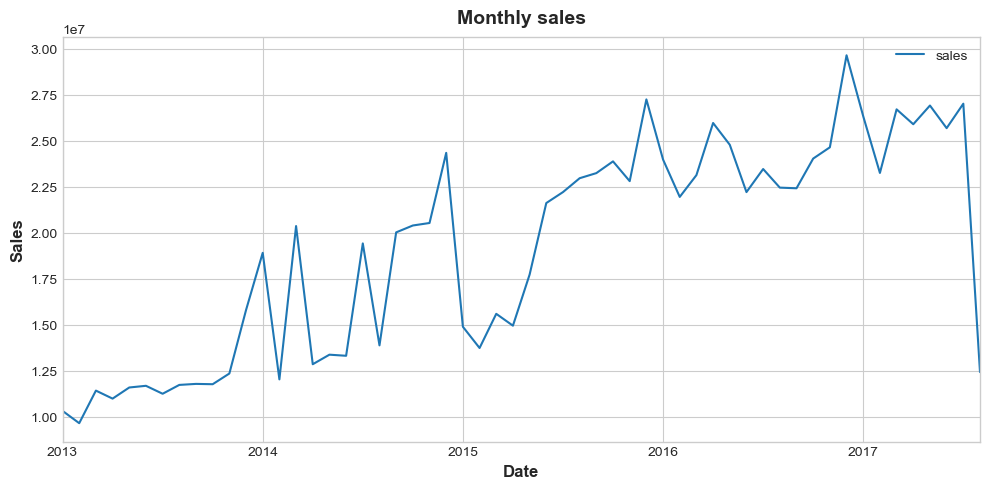

In [84]:
# Plotting th sales
sales.plot(figsize=(10,5))
plt.ylabel('Sales')
plt.xlabel('Date')
plt.title('Monthly sales');

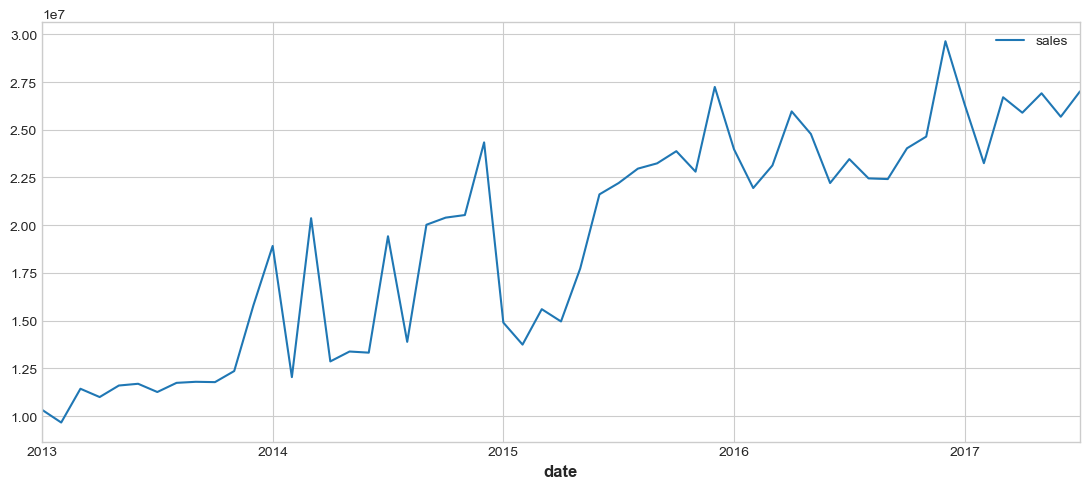

In [10]:
data = sales.drop(sales.tail(1).index)
data.plot();

In [11]:
eda = raw.copy()
eda = eda.reset_index()

In [12]:
sales_by_store = eda.groupby('store_nbr', as_index=False)['sales'].sum().sort_values('sales', ascending=False).head(5)
sales_by_store

store_nbr       sales
38        44  62087552.0
39        45  54498012.0
41        47  50948312.0
22         3  50481912.0
43        49  43420096.0

In [13]:
top5_storenbr = list(sales_by_store['store_nbr'])
top5_storenbr

['44', '45', '47', '3', '49']

In [14]:
sns.barplot(x='sales', y=top5_storenbr, data=sales_by_store)
plt.suptitle('Top 10 store_nbr by sales')
plt.ylabel('store_nbr')
plt.xlabel('sales in Millions USD');

In [15]:
sales_by_family = eda.groupby('family', as_index=False)['sales'].sum().sort_values('sales', ascending=False).head(5)
sales_by_family

family        sales
12  GROCERY I  343462720.0
3   BEVERAGES  216954480.0
30    PRODUCE  122704688.0
7    CLEANING   97521288.0
8       DAIRY   64487708.0

In [16]:
top5_families = list(sales_by_family['family'])

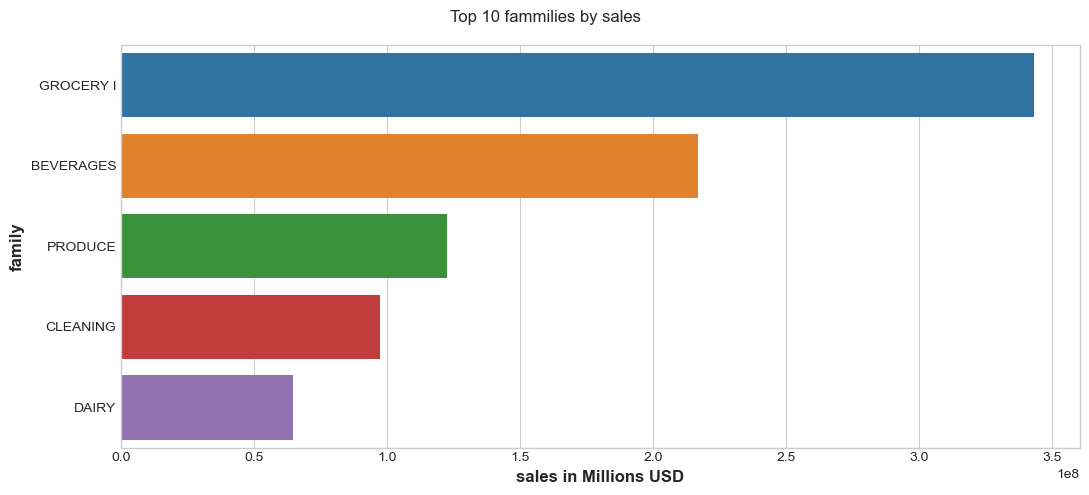

In [17]:
sns.barplot(x='sales', y=top5_families, data=sales_by_family)
plt.suptitle('Top 10 fammilies by sales')
plt.ylabel('family')
plt.xlabel('sales in Millions USD');

In [18]:
sales_store_fam = eda.groupby(['store_nbr', 'family' ], as_index=False).sum().sort_values('sales', ascending=False)
sales_store_fam


store_nbr           family       sales
1266        44        GROCERY I  16386055.0
1299        45        GROCERY I  16349751.0
1365        47        GROCERY I  15514528.0
1332        46        GROCERY I  14342262.0
1257        44        BEVERAGES  13417859.0
...        ...              ...         ...
679         28       LADIESWEAR         0.0
1637        54  LAWN AND GARDEN         0.0
928         35            BOOKS         0.0
1753         9            BOOKS         0.0
103         12            BOOKS         0.0

[1782 rows x 3 columns]

In [19]:
sales_store_fam[sales_store_fam['store_nbr'] == '50'][['family', 'sales']].iloc[0].to_list()[0]

'GROCERY I'

# Linear Regression

### Usando un time step (dummy de la tendencia) como la feature para predecir

In [20]:
train = data.copy()
train['time'] = np.arange(0, len(train))
train.head()

sales  time
date                        
2013-01-31  10327625.0     0
2013-02-28   9658960.0     1
2013-03-31  11428497.0     2
2013-04-30  10993465.0     3
2013-05-31  11597704.0     4

In [21]:
X = train.loc[:, ['time']]
X.head() # It's a dataframe

time
date            
2013-01-31     0
2013-02-28     1
2013-03-31     2
2013-04-30     3
2013-05-31     4

In [22]:
y = train.loc[:, 'sales']
y.head() # It's a series

date
2013-01-31    10327625.0
2013-02-28     9658960.0
2013-03-31    11428497.0
2013-04-30    10993465.0
2013-05-31    11597704.0
Freq: M, Name: sales, dtype: float32

In [23]:
# Train the model
model = LinearRegression()
results = model.fit(X, y)

In [24]:
# Make predictions
y_pred = pd.Series(results.predict(X), index=X.index)
y_pred.head()

date
2013-01-31    1.055738e+07
2013-02-28    1.088098e+07
2013-03-31    1.120459e+07
2013-04-30    1.152820e+07
2013-05-31    1.185180e+07
Freq: M, dtype: float64

In [25]:
fig, ax = plt.subplots()
ax = y.plot(**plot_params, label='actual')
ax = y_pred.plot(ax=ax, linewidth=3, label='prediction')
ax.set_title('Time Plot of Sales')
plt.legend(loc='best')
plt.show();

#### Aquí podemos ver como se puede generar una regresión solo utilizando un dummy de trend.

### Usando un time step (dummy de la tendencia) como la feature para predecir

In [26]:
train['lag1'] = train['sales'].shift(1)
train.head()

sales  time        lag1
date                                    
2013-01-31  10327625.0     0         NaN
2013-02-28   9658960.0     1  10327625.0
2013-03-31  11428497.0     2   9658960.0
2013-04-30  10993465.0     3  11428497.0
2013-05-31  11597704.0     4  10993465.0

In [27]:
X = train.loc[:, ['lag1']].dropna()
X.head()

lag1
date                  
2013-02-28  10327625.0
2013-03-31   9658960.0
2013-04-30  11428497.0
2013-05-31  10993465.0
2013-06-30  11597704.0

In [28]:
y = train.loc[:, 'sales'][1:]
y.head()

date
2013-02-28     9658960.0
2013-03-31    11428497.0
2013-04-30    10993465.0
2013-05-31    11597704.0
2013-06-30    11689344.0
Freq: M, Name: sales, dtype: float32

In [29]:
# Train the model
model = LinearRegression()
results = model.fit(X, y)

In [30]:
y_pred = pd.Series(results.predict(X), index=X.index)
y_pred.head()

date
2013-02-28    12089297.0
2013-03-31    11530713.0
2013-04-30    13008935.0
2013-05-31    12645521.0
2013-06-30    13150286.0
Freq: M, dtype: float32

In [31]:
fig, ax = plt.subplots()
ax.plot(X['lag1'], y, '.', color='0.25')
ax.plot(X['lag1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Sales')
ax.set_xlabel('lag1')
ax.set_title('Lag Plot of Sales');

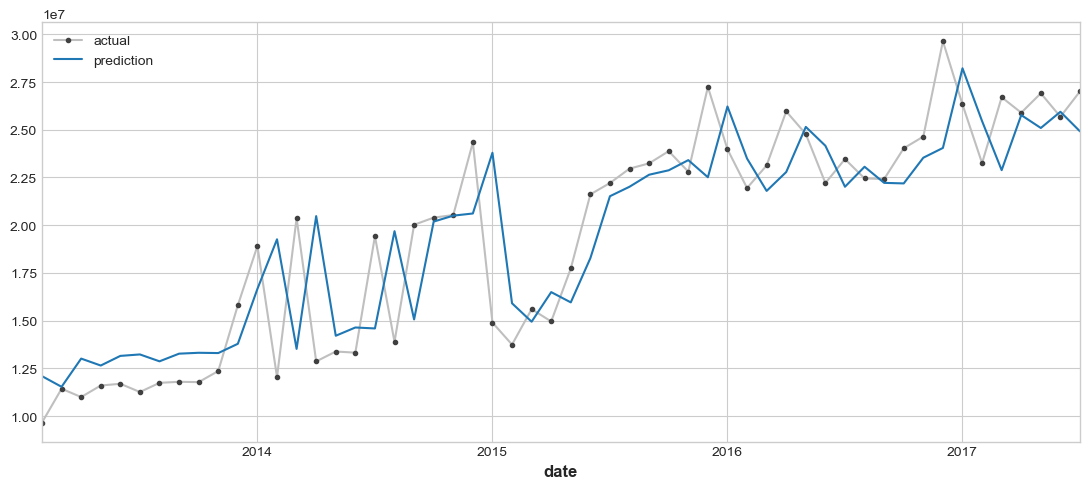

In [32]:
ax = y.plot(**plot_params, label='actual')
ax = y_pred.plot(label='prediction')
plt.legend(loc='best')
plt.show()

# Trend

In [33]:
train = data.copy()

In [34]:
moving_average = train.rolling(
    window=12,
    center=True,
    min_periods=6, # half the size of the window
).mean()

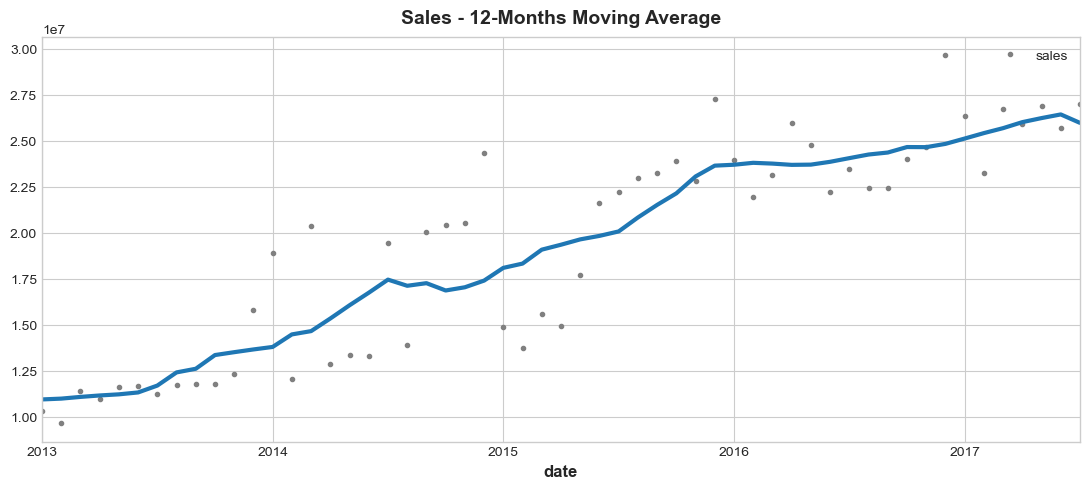

In [35]:
ax = train.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Sales - 12-Months Moving Average", legend=False
);

In [36]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=train.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=2,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)

In [37]:
X = dp.in_sample() # Add trend dummy automatically
X.head()

const  trend  trend_squared
date                                   
2013-01-31    1.0    1.0            1.0
2013-02-28    1.0    2.0            4.0
2013-03-31    1.0    3.0            9.0
2013-04-30    1.0    4.0           16.0
2013-05-31    1.0    5.0           25.0

In [38]:
y = train['sales']

In [39]:
# The intercept is the same as the `const` feature from DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
results = model.fit(X, y)

y_pred = pd.Series(results.predict(X), index=X.index)

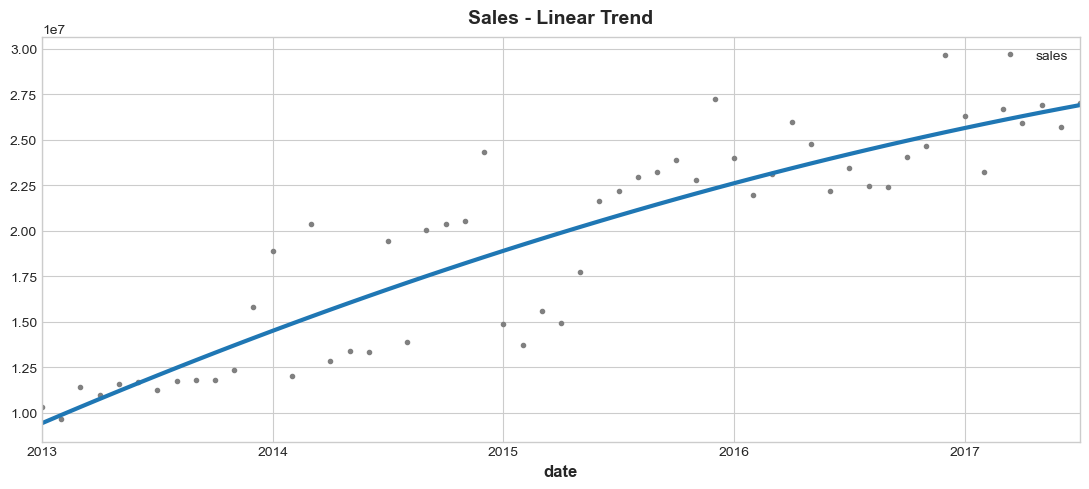

In [40]:
ax = train.plot(style=".", color="0.5", title="Sales - Linear Trend")
pred = y_pred.plot(ax=ax, linewidth=3, label="Trend")

##### The trend discovered by our LinearRegression model is almost identical to the moving average plot, which suggests that a linear trend was the right decision in this case.

In [41]:
X = dp.out_of_sample(steps=12)

y_fore = pd.Series(results.predict(X), index=X.index)

y_fore.head()

2017-08-31    2.709872e+07
2017-09-30    2.728764e+07
2017-10-31    2.747184e+07
2017-11-30    2.765132e+07
2017-12-31    2.782606e+07
Freq: M, dtype: float64

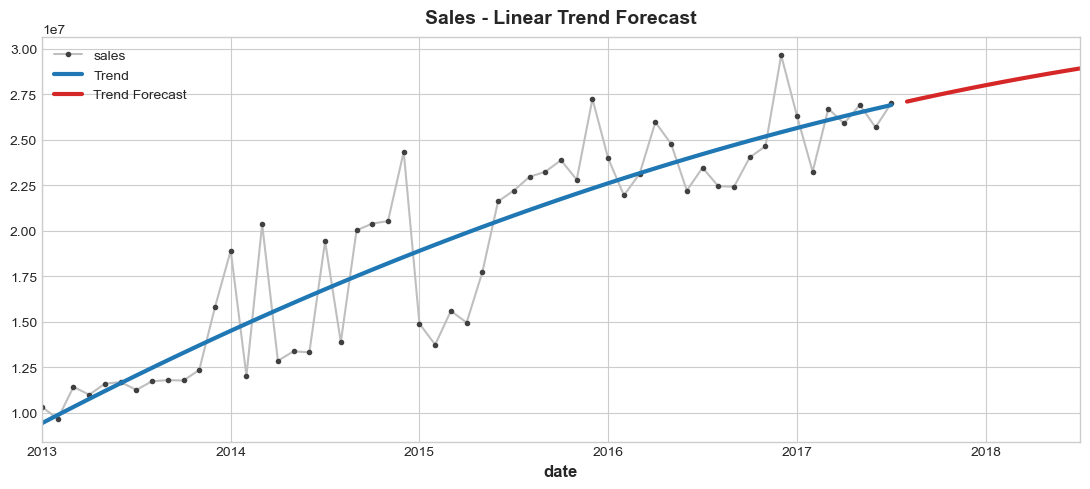

In [42]:
ax = train.plot(title="Sales - Linear Trend Forecast", **plot_params)
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
plt.legend()

# Seasonality

### Seasonal plot code

In [43]:
# Seasonal plot
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

### Periodogram code

In [44]:
# Periodogram
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

### Regression example

<AxesSubplot:title={'center':'Seasonal Plot (year/month)'}, xlabel='month', ylabel='sales'>

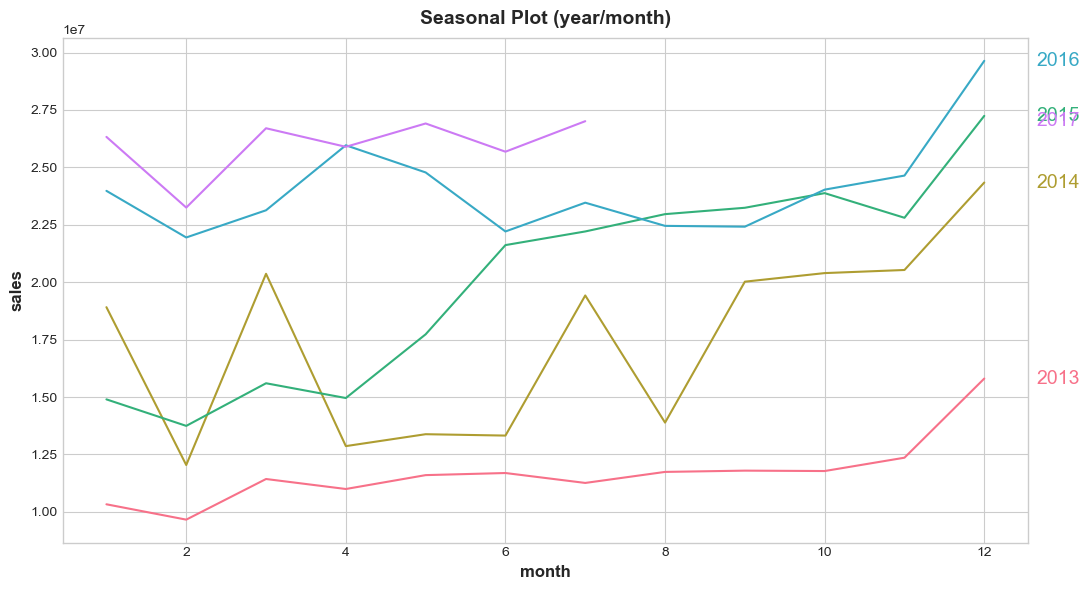

In [45]:
X = data.copy()

X['month'] = X.index.month
X['year'] = X.index.year

fig, ax = plt.subplots(1, 1, figsize=(11, 6))
seasonal_plot(X, y='sales', period='year', freq='month', ax=ax)

C:\Users\RoccoJustice\AppData\Local\Temp\ipykernel_20900\1466452657.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  plot_periodogram(data['sales']);


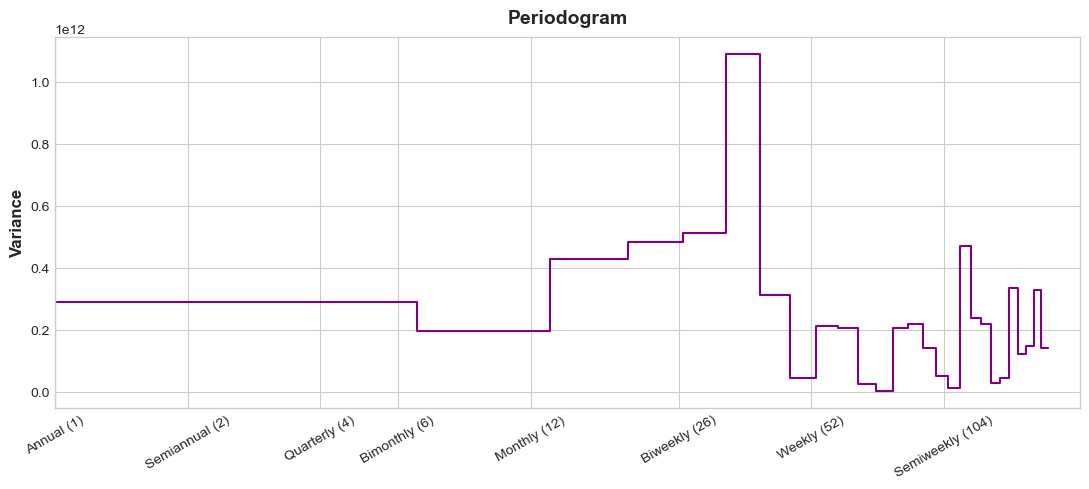

In [46]:
plot_periodogram(data['sales']);

In [47]:
from statsmodels.tsa.deterministic import CalendarFourier

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=data.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index

In [48]:
X.tail()

const  trend  s(2,12)  s(3,12)  s(12,12)  sin(1,freq=A-DEC)  \
date                                                                      
2017-03-31    1.0   51.0      0.0      1.0       0.0           0.999250   
2017-04-30    1.0   52.0      0.0      0.0       0.0           0.888057   
2017-05-31    1.0   53.0      0.0      0.0       0.0           0.530730   
2017-06-30    1.0   54.0      0.0      0.0       0.0           0.043022   
2017-07-31    1.0   55.0      0.0      0.0       0.0          -0.471160   

            cos(1,freq=A-DEC)  sin(2,freq=A-DEC)  cos(2,freq=A-DEC)  \
date                                                                  
2017-03-31           0.038722           0.077386          -0.997001   
2017-04-30          -0.459733          -0.816538          -0.577292   
2017-05-31          -0.847541          -0.899631           0.436651   
2017-06-30          -0.999074          -0.085965           0.996298   
2017-07-31          -0.882048           0.831171           0.556017   

            sin(3,freq=A-DEC)  ...  sin(6,freq=A-DEC)  cos(6,freq=A-DEC)  \
date                           ...                                         
2017-03-31          -0.993257  ...           0.230306          -0.973118   
2017-04-30          -0.137279  ...          -0.271958           0.962309   
2017-05-31           0.994218  ...           0.213521          -0.976938   
2017-06-30           0.128748  ...          -0.255353           0.966848   
2017-07-31          -0.995105  ...           0.196673          -0.980469   

            sin(7,freq=A-DEC)  cos(7,freq=A-DEC)  sin(8,freq=A-DEC)  \
date                                                                  
2017-03-31          -0.963471          -0.267814          -0.304921   
2017-04-30           0.979614          -0.200891          -0.628763   
2017-05-31          -0.699458           0.714673           0.972118   
2017-06-30           0.296713          -0.954967          -0.337523   
2017-07-31           0.288482           0.957485          -0.705584   

            cos(8,freq=A-DEC)  sin(9,freq=A-DEC)  cos(9,freq=A-DEC)  \
date                                                                  
2017-03-31           0.952378           0.939856           0.341571   
2017-04-30          -0.777597          -0.401488           0.915864   
2017-05-31          -0.234491          -0.948362          -0.317191   
2017-06-30           0.941317           0.377708          -0.925925   
2017-07-31          -0.708627           0.956235           0.292600   

            sin(10,freq=A-DEC)  cos(10,freq=A-DEC)  
date                                                
2017-03-31            0.377708           -0.925925  
2017-04-30            0.997917           -0.064508  
2017-05-31            0.635432            0.772157  
2017-06-30           -0.417194            0.908818  
2017-07-31           -0.981306            0.192452  

[5 rows x 25 columns]

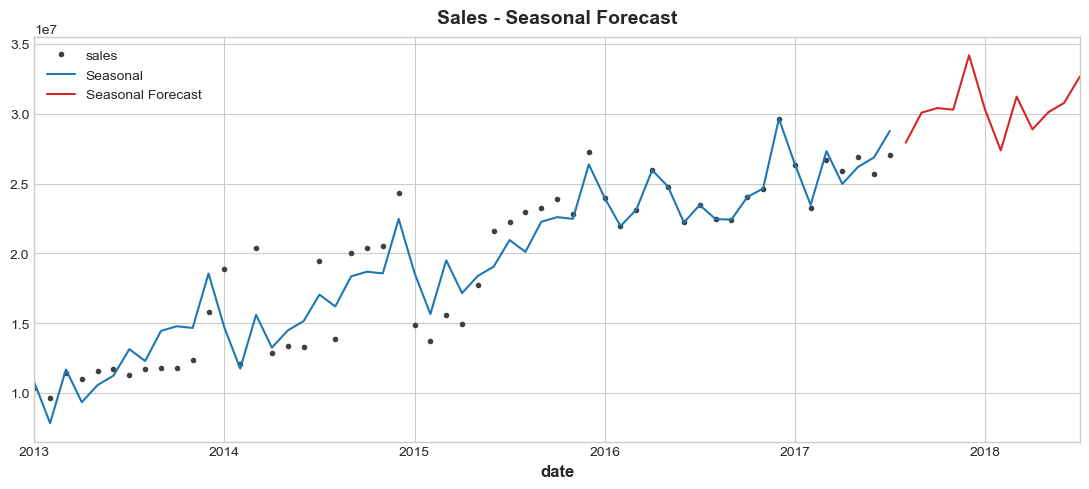

In [49]:
y = data['sales']

model = LinearRegression(fit_intercept=False)
results = model.fit(X, y)

y_pred = pd.Series(results.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=12)
y_fore = pd.Series(results.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Sales - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
ax.legend();

### Regression

In [50]:
store_sales = pd.read_csv('train.csv', usecols=['date', 'sales'], parse_dates=['date'], infer_datetime_format=True, index_col='date')

"\nstore_sales['date'] = store_sales.date.dt.to_period('D')\n\nstore_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()\n\naverage_sales = (\n    store_sales\n    .groupby('date').mean()\n    .squeeze()\n    .loc['2017']\n)\n"

In [51]:
average_sales = store_sales.resample('D').mean().loc['2017']

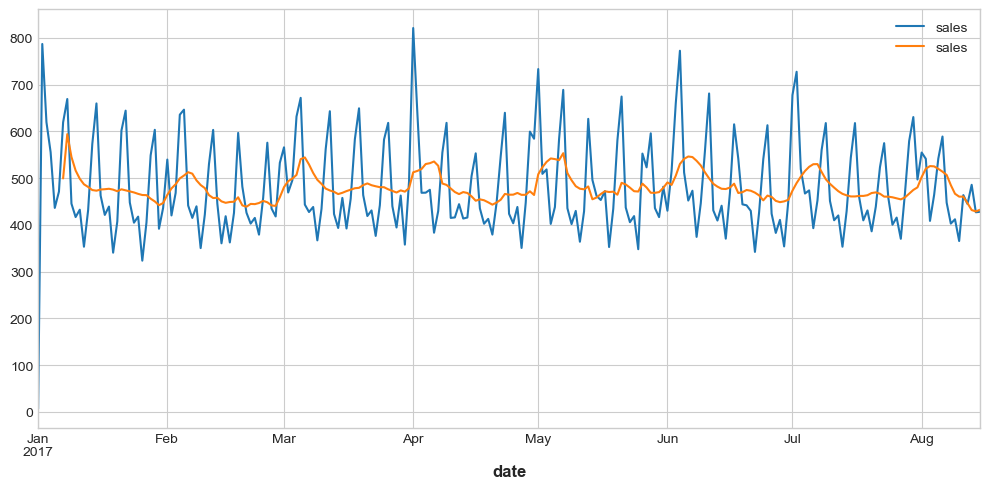

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
average_sales.plot(label='sales', ax=ax)
average_sales.rolling(window=7).mean().plot(label='moving avg', ax=ax)
plt.legend(loc='best');

C:\Users\RoccoJustice\AppData\Local\Temp\ipykernel_20900\4200732906.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X["week"] = X.index.week


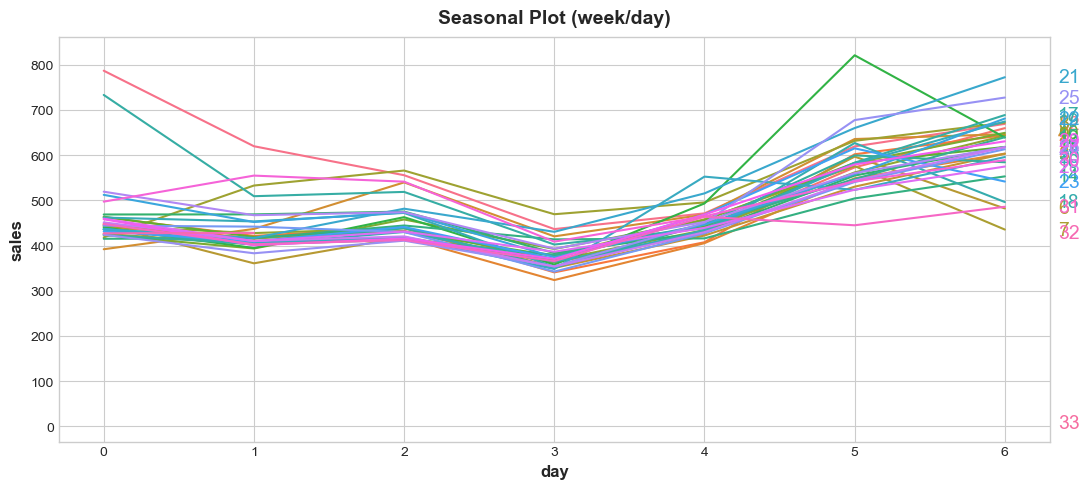

In [53]:
X = average_sales.copy()
X["week"] = X.index.week
X["day"] = X.index.dayofweek
seasonal_plot(X, y='sales', period='week', freq='day');

C:\Users\RoccoJustice\AppData\Local\Temp\ipykernel_20900\1099696491.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  plot_periodogram(average_sales.squeeze())


<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

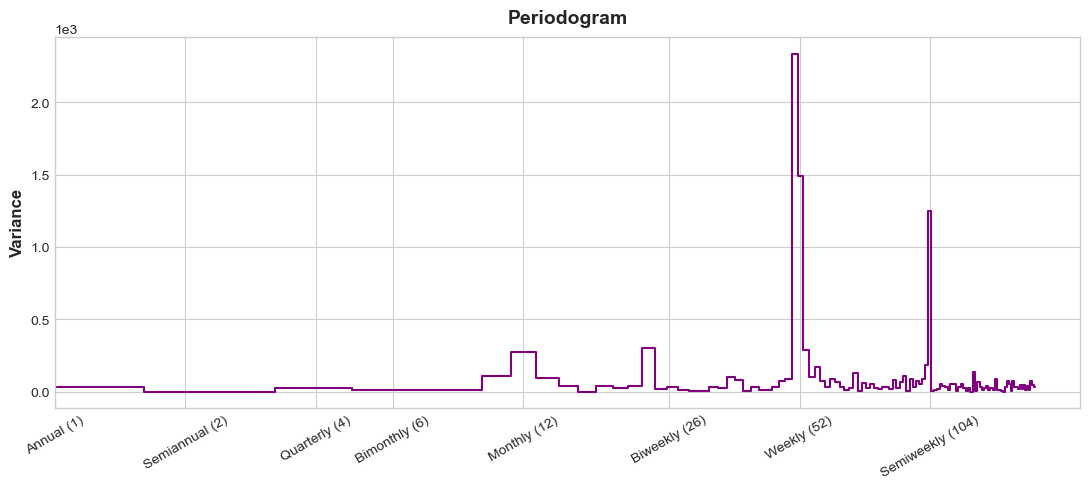

In [54]:
plot_periodogram(average_sales.squeeze())

In [55]:
# For reference, by default Prophet uses a Fourier order of 3 for weekly seasonality, 4 for monthly and 10 for yearly
# https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#:~:text=For%20reference%2C%20by%20default%20Prophet,and%2010%20for%20yearly%20seasonality.
y = average_sales.copy()

fourier = CalendarFourier(freq='M', order=4)
dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True
)
X = dp.in_sample()

In [56]:
X.head()

const  trend  s(2,7)  s(3,7)  s(4,7)  s(5,7)  s(6,7)  s(7,7)  \
date                                                                       
2017-01-01    1.0    1.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-01-02    1.0    2.0     1.0     0.0     0.0     0.0     0.0     0.0   
2017-01-03    1.0    3.0     0.0     1.0     0.0     0.0     0.0     0.0   
2017-01-04    1.0    4.0     0.0     0.0     1.0     0.0     0.0     0.0   
2017-01-05    1.0    5.0     0.0     0.0     0.0     1.0     0.0     0.0   

            sin(1,freq=M)  cos(1,freq=M)  sin(2,freq=M)  cos(2,freq=M)  \
date                                                                     
2017-01-01       0.000000       1.000000       0.000000       1.000000   
2017-01-02       0.201299       0.979530       0.394356       0.918958   
2017-01-03       0.394356       0.918958       0.724793       0.688967   
2017-01-04       0.571268       0.820763       0.937752       0.347305   
2017-01-05       0.724793       0.688967       0.998717      -0.050649   

            sin(3,freq=M)  cos(3,freq=M)  sin(4,freq=M)  cos(4,freq=M)  
date                                                                    
2017-01-01       0.000000       1.000000       0.000000       1.000000  
2017-01-02       0.571268       0.820763       0.724793       0.688967  
2017-01-03       0.937752       0.347305       0.998717      -0.050649  
2017-01-04       0.968077      -0.250653       0.651372      -0.758758  
2017-01-05       0.651372      -0.758758      -0.101168      -0.994869

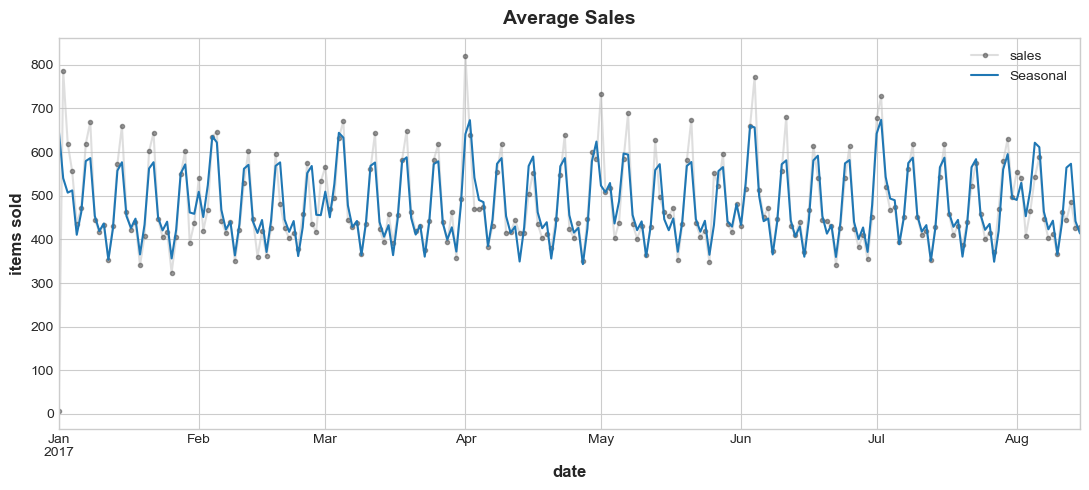

In [57]:
# Modeling and fittign values
model = LinearRegression()
results = model.fit(X, y)

y_pred = pd.Series(results.predict(X).squeeze(), index=X.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend(loc='best')
plt.show();

C:\Users\RoccoJustice\AppData\Local\Temp\ipykernel_20900\1366174271.py:5: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ax1 = plot_periodogram(y.squeeze(), ax=ax1)
C:\Users\RoccoJustice\AppData\Local\Temp\ipykernel_20900\1366174271.py:7: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ax2 = plot_periodogram(y_deseason, ax=ax2);


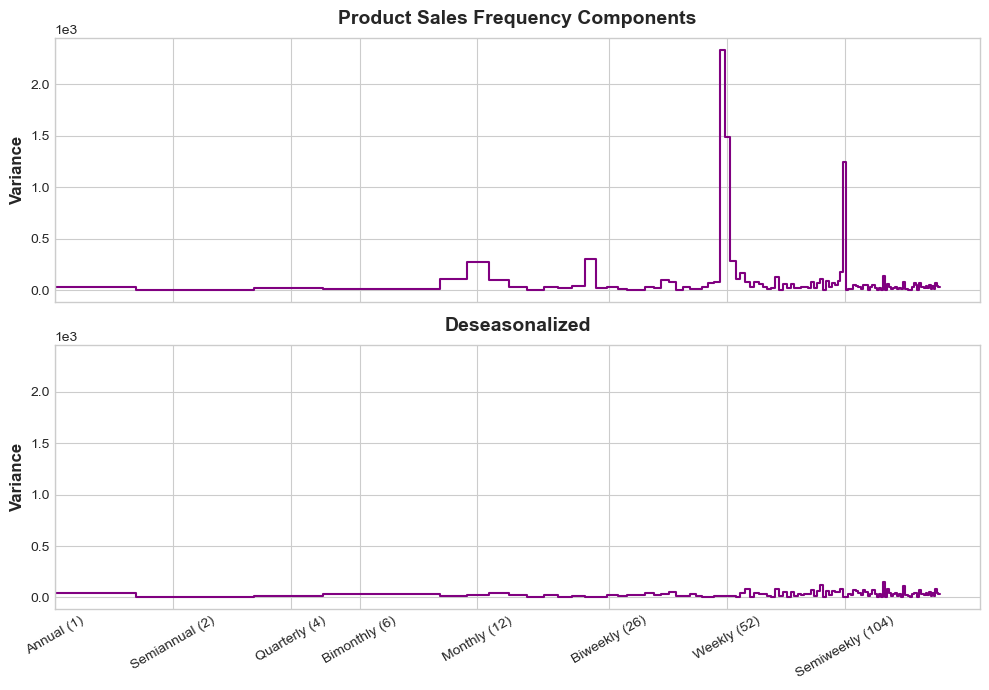

In [58]:
# Checking if model captures seasonality
y_deseason = y.squeeze() - y_pred

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))
ax1 = plot_periodogram(y.squeeze(), ax=ax1)
ax1.set_title("Product Sales Frequency Components")
ax2 = plot_periodogram(y_deseason, ax=ax2);
ax2.set_title("Deseasonalized");

In [59]:
# Include holidays features to capture some noise
holidays_events = pd.read_csv(
    'holidays_events.csv',
    usecols=['date', 'description', 'locale'],
    dtype={
        'locale': 'category',
        'description': 'category',
    },
    parse_dates=['date'],
    infer_datetime_format=True
)


holidays_events = holidays_events.set_index('date')

In [60]:
holidays = (
    holidays_events
    .query("locale in ['National', 'Regional']")
    .loc['2017-01-01':'2017-08-18', ['description']]
    .assign(description=lambda x: x.description.cat.remove_unused_categories())
)

holidays

description
date                                              
2017-01-01                      Primer dia del ano
2017-01-02             Traslado Primer dia del ano
2017-02-27                                Carnaval
2017-02-28                                Carnaval
2017-04-01           Provincializacion de Cotopaxi
2017-04-14                           Viernes Santo
2017-05-01                         Dia del Trabajo
2017-05-13                       Dia de la Madre-1
2017-05-14                         Dia de la Madre
2017-05-24                    Batalla de Pichincha
2017-05-26           Traslado Batalla de Pichincha
2017-06-25           Provincializacion de Imbabura
2017-08-10           Primer Grito de Independencia
2017-08-11  Traslado Primer Grito de Independencia

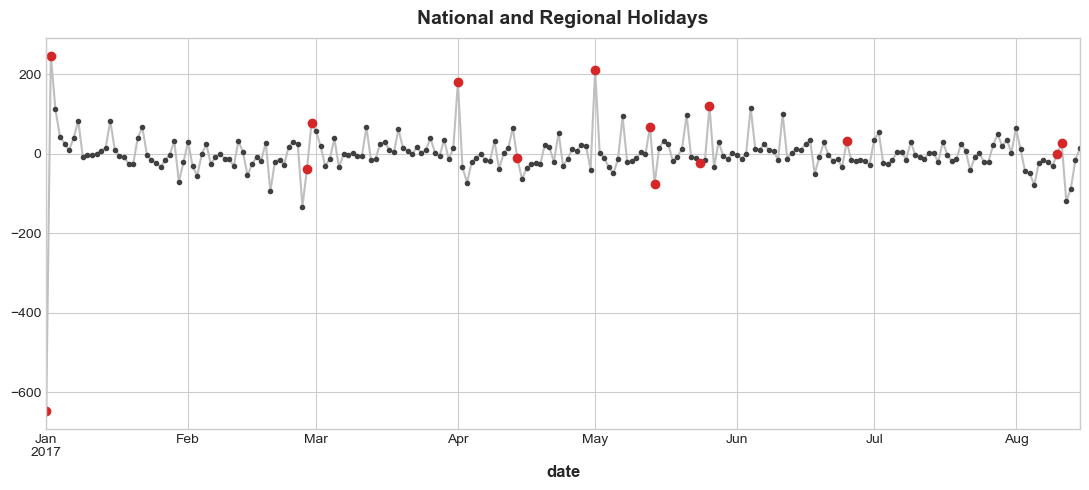

In [61]:
ax = y_deseason.plot(**plot_params)
plt.plot_date(holidays.index, y_deseason[holidays.index.strftime('%Y-%m-%d').to_list()], color='C3')
ax.set_title('National and Regional Holidays');

In [62]:
X_holidays = pd.get_dummies(holidays)

X2 = X.join(X_holidays, on='date').fillna(0.0)

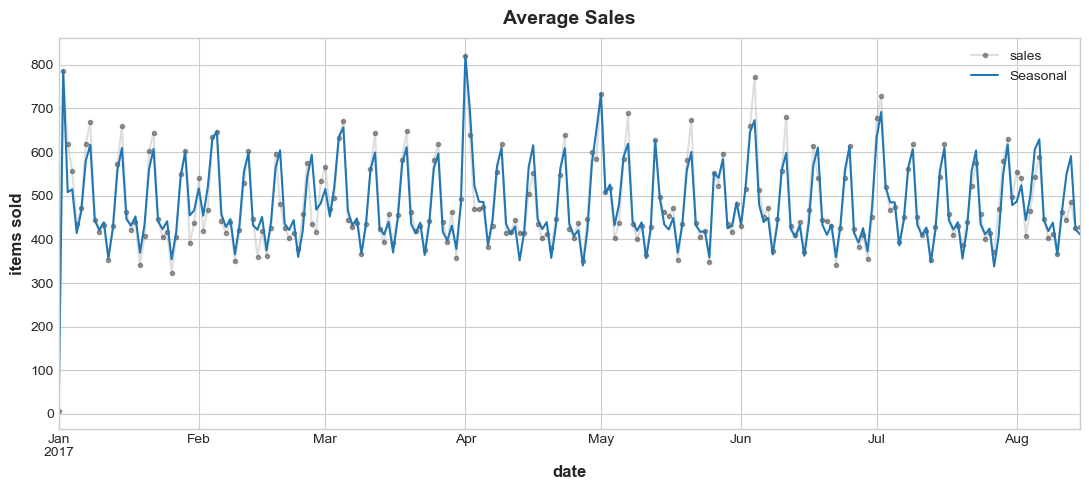

In [63]:
# Fitting and plotting new model
model = LinearRegression()
results = model.fit(X2, y)

y_pred = pd.Series(model.predict(X2).reshape(-1), index=X2.index, name='Fitted')

ax = y.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend();

In [64]:
store_sales = raw.reset_index().set_index(['store_nbr', 'family', 'date']).sort_index()

In [65]:
y_train = store_sales.unstack(['store_nbr', 'family']).loc['2017']

# Create training data
fourier = CalendarFourier(freq='M', order=3)
dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample()
X['NewYear'] = (X.index.dayofyear == 1)

model = LinearRegression(fit_intercept=False)
results = model.fit(X, y_train)
y_pred = pd.DataFrame(results.predict(X), index=X.index, columns=y_train.columns)

In [66]:
store_sales.index.get_level_values('family').unique()

CategoricalIndex(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
                  'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI',
                  'EGGS', 'FROZEN FOODS', 'GROCERY I', 'GROCERY II',
                  'HARDWARE', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II',
                  'HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR',
                  'LAWN AND GARDEN', 'LINGERIE', 'LIQUOR,WINE,BEER',
                  'MAGAZINES', 'MEATS', 'PERSONAL CARE', 'PET SUPPLIES',
                  'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS',
                  'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD'],
                 categories=['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', ...], ordered=False, dtype='category', name='family')

In [71]:
STORE_NBR = '1'  # 1 - 54
FAMILY = 'AUTOMOTIVE'

ax = y_train.loc(axis=1)['sales', STORE_NBR, FAMILY].plot(**plot_params, label='actual')
ax = y_pred.loc(axis=1)['sales', STORE_NBR, FAMILY].plot(ax=ax, label='fitted')
ax.set_title(f'{FAMILY} Sales at Store {STORE_NBR}')
plt.legend(loc='best');

In [74]:
from sklearn.metrics import mean_squared_error as MSE

mse = MSE(y_train, y_pred)
mse

60722.900627046976

In [ ]:
'''
for i in top5_storenbr:
    for j in top5_families:
        plt.figure()
        ax = y.loc(axis=1)['sales', i, j].plot(**plot_params, label='actual')
        ax = y_pred.loc(axis=1)['sales', i, j].plot(ax=ax, label='fitted')
        ax.set_title(f'{j} Sales at Store {i}')
        plt.legend(loc='best');
'''        

"\nfor i in top5_storenbr:\n    for j in top5_families:\n        plt.figure()\n        ax = y.loc(axis=1)['sales', i, j].plot(**plot_params, label='actual')\n        ax = y_pred.loc(axis=1)['sales', i, j].plot(ax=ax, label='fitted')\n        ax.set_title(f'{j} Sales at Store {i}')\n        plt.legend(loc='best');\n"

In [75]:
test = pd.read_csv(
    'test.csv',
    usecols=['store_nbr', 'family', 'date'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32'
    },
    parse_dates=['date'],
    infer_datetime_format=True,
    index_col=['store_nbr','family','date']
)

In [76]:
test['sales'] = 0

In [78]:
y_test = test.unstack(['store_nbr','family'])

fourier = CalendarFourier(freq='M', order=3)
dp = DeterministicProcess(
    index=y_test.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample()
X['NewYear'] = (X.index.day_of_year == 1)

forecast = pd.DataFrame(results.predict(X), index=X.index, columns=y_test.columns)

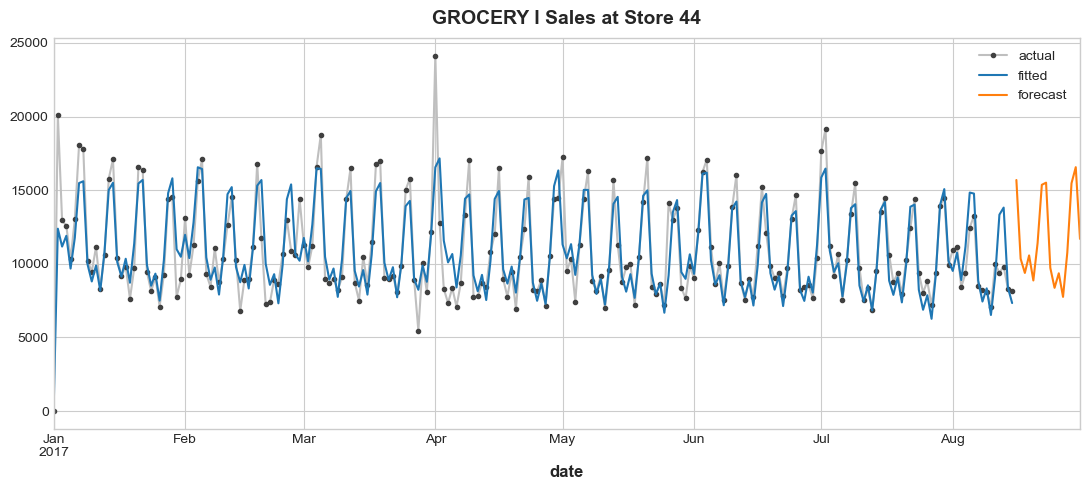

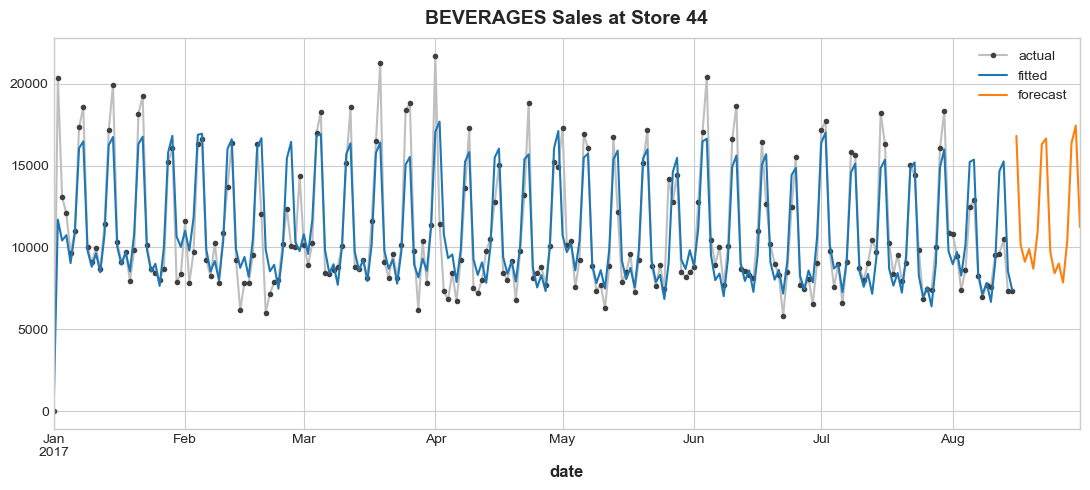

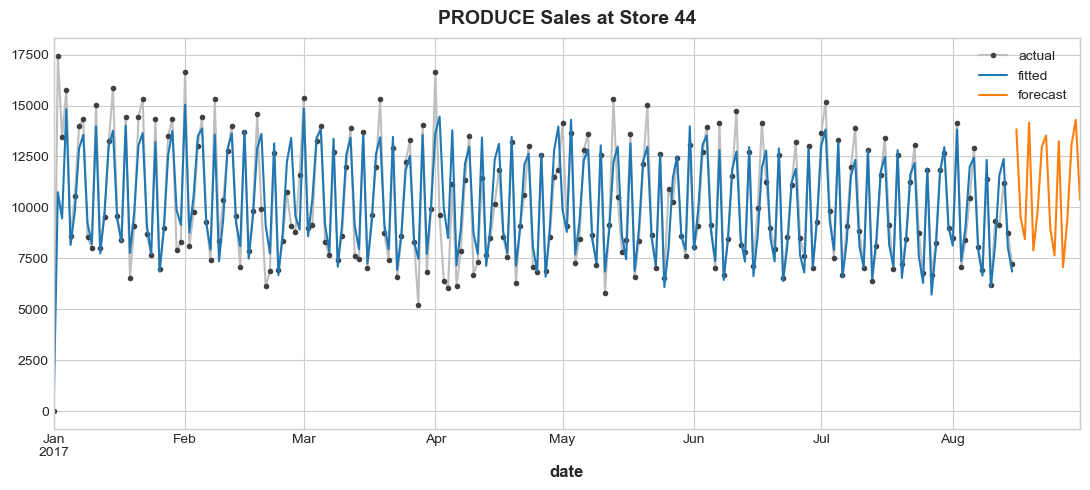

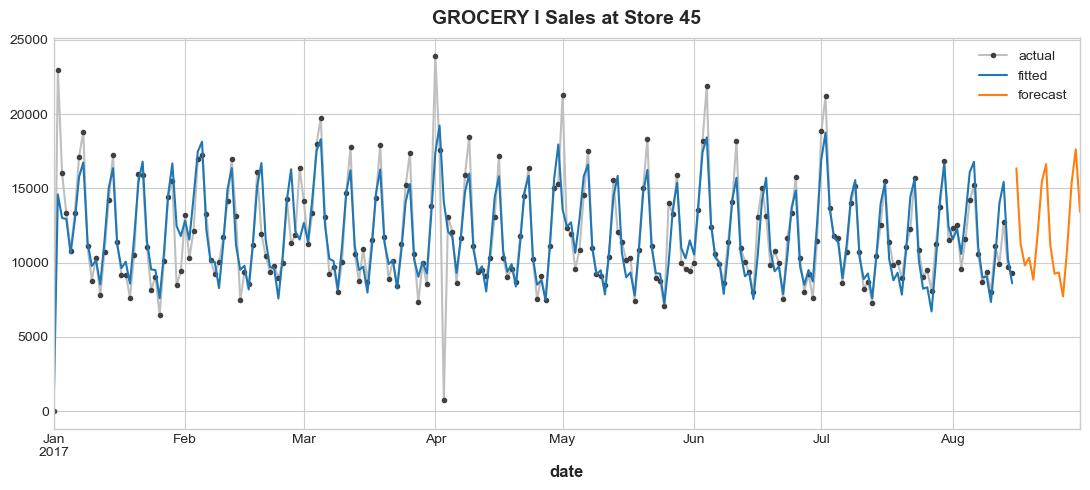

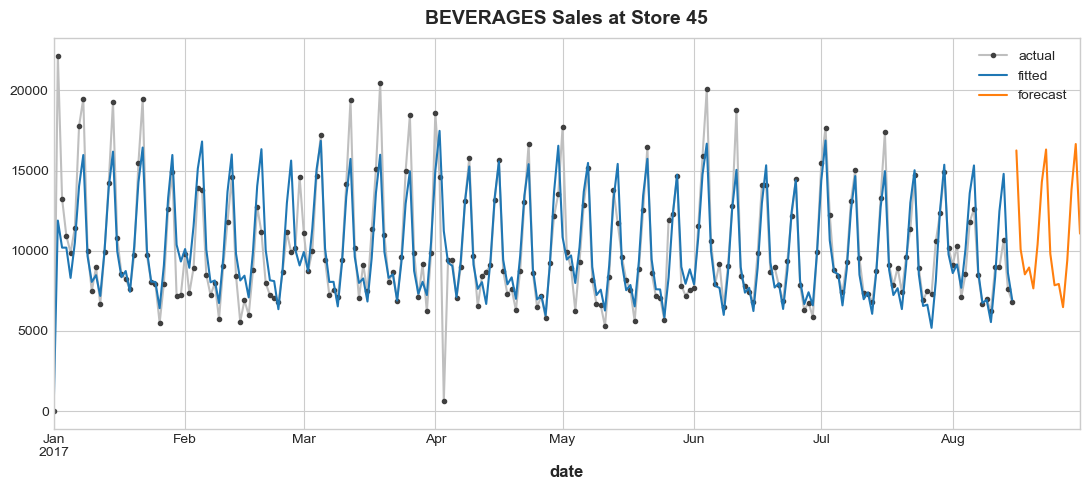

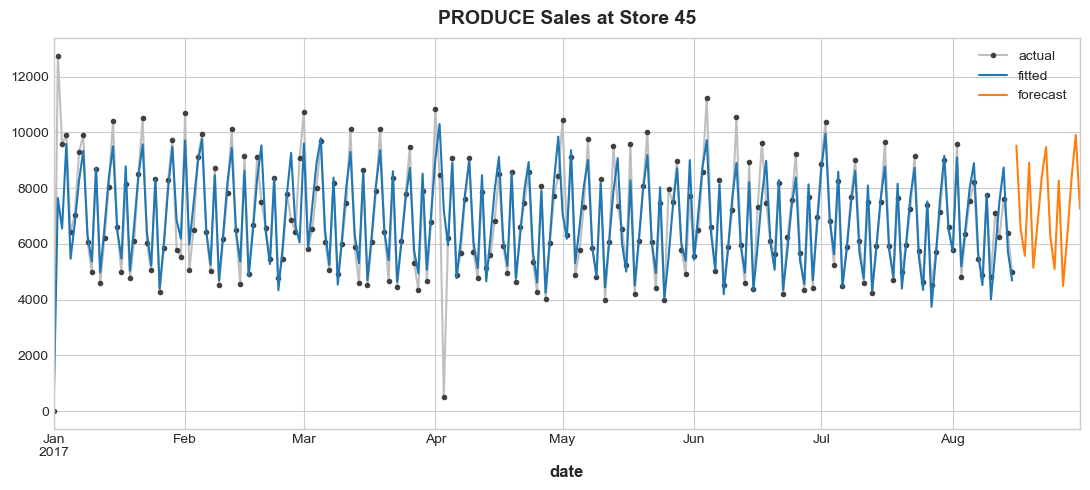

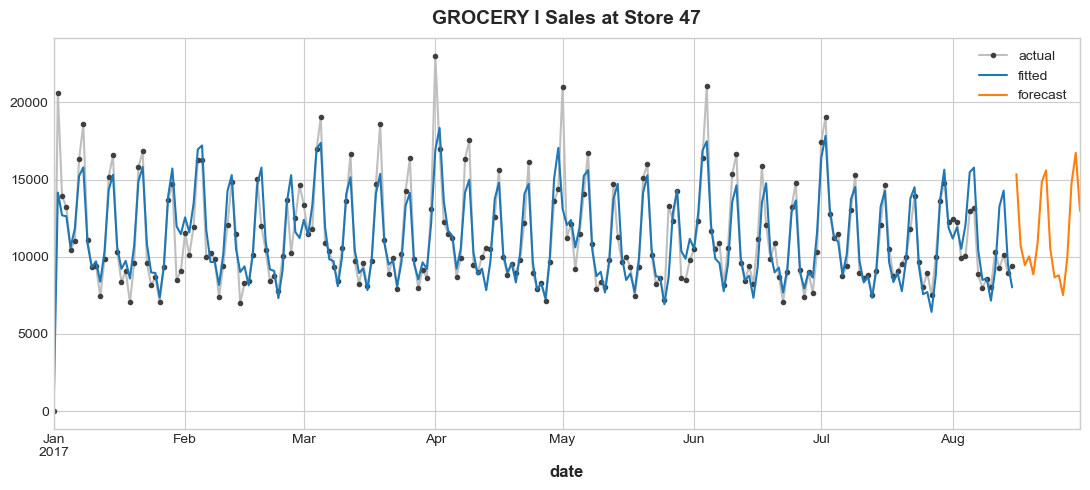

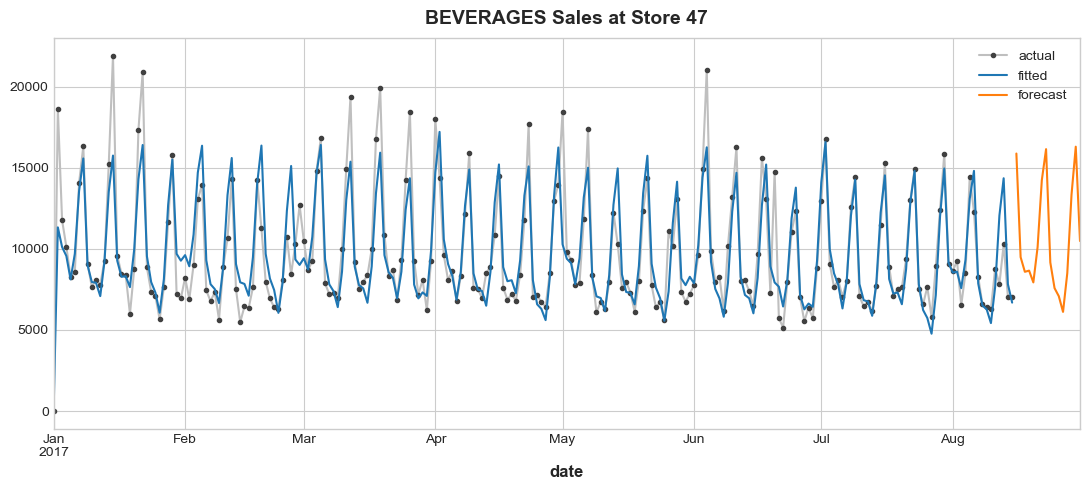

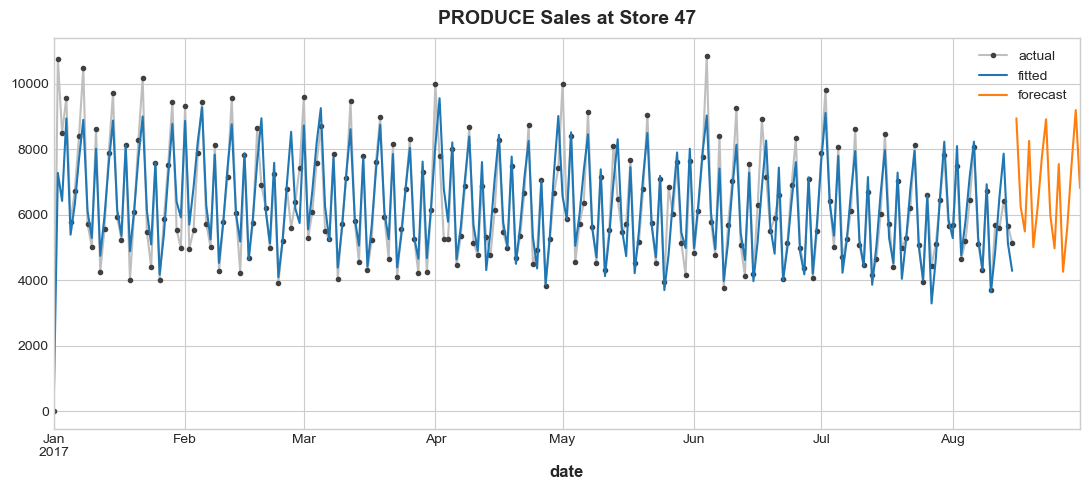

In [81]:
for i in top5_storenbr[0:3]:
    for j in top5_families[0:3]:
        try:
            plt.figure()
            ax = y_train.loc(axis=1)['sales', i, j].plot(**plot_params, label='actual')
            ax = y_pred.loc(axis=1)['sales', i, j].plot(ax=ax, label='fitted')
            ax = forecast.loc(axis=1)['sales', i, j].plot(ax=ax, label='forecast')
            ax.set_title(f'{j} Sales at Store {i}')
            plt.legend(loc='best');
        
        except:
            continue